In [11]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 100)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import joblib

df=pd.read_csv("../data/processed/cleaned_heart.csv")
print("Data loaded successfully.")
print(f"Data shape: rows={df.shape[0]}, columns={df.shape[1]}")

Data loaded successfully.
Data shape: rows=302, columns=14


In [12]:
# Continuous features
# log_features = ['chol', 'oldpeak']                 # highly skewed
normal_features = ['age', 'trestbps', 'thalach','chol', 'oldpeak','cp', 'restecg', 'slope', 'ca', 'thal','sex', 'fbs', 'exang']   # near normal

# Binary features
# binary_features = ['sex', 'fbs', 'exang']

# Categorical features
# categorical_features = ['cp', 'restecg', 'slope', 'ca', 'thal']

In [13]:
X=df.drop(columns=['target'])
y=df["target"]
print("Features and target variable separated.")
print(f"Feature set shape: {X.shape}")
print(f"Target variable shape: {y.shape}")
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Data split into training and testing sets.")
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Features and target variable separated.
Feature set shape: (302, 13)
Target variable shape: (302,)
Data split into training and testing sets.
Training set shape: X_train=(241, 13), y_train=(241,)
Testing set shape: X_test=(61, 13), y_test=(61,)


In [14]:
# log_numeric_transformer=Pipeline(
#     steps=[
        #  ("log",FunctionTransformer(np.log1p,validate=False)),
#         ("scaler",StandardScaler())
#     ]
# )
normal_numeric_transformer=Pipeline(
    steps=[
        ("scaler",StandardScaler())
    ]
)
# categorical_transformer=Pipeline(
#     steps=[
#         ("onehot",OneHotEncoder(handle_unknown="ignore",sparse_output=False,drop="first"))
#     ]
# )
print("Preprocessing pipelines created for different feature types.")

Preprocessing pipelines created for different feature types.


In [15]:
preprocessor=ColumnTransformer(
    transformers=[
        # ("log_numeric",log_numeric_transformer,log_features),
        ("normal_numeric",normal_numeric_transformer,normal_features),
        # ("categorical",categorical_transformer,categorical_features),
        # ("binary","passthrough",binary_features)
    ]
)
print("ColumnTransformer created to combine preprocessing steps.")

ColumnTransformer created to combine preprocessing steps.


In [16]:
knn_pipeline=Pipeline(
    steps=[
        ("preprocessor",preprocessor),
        ("knn_classifier",KNeighborsClassifier())
    ]
)
print("KNN pipeline created with preprocessing and classifier.")
knn_pipeline.fit(X_train,y_train)
print("KNN model trained successfully.")
baseline_pred=knn_pipeline.predict(X_test)
baseline_accuracy=accuracy_score(y_test,baseline_pred)
print(f"Baseline accuracy of the KNN model: {baseline_accuracy*100:.3f}% having k=5.")

KNN pipeline created with preprocessing and classifier.
KNN model trained successfully.
Baseline accuracy of the KNN model: 91.803% having k=5.


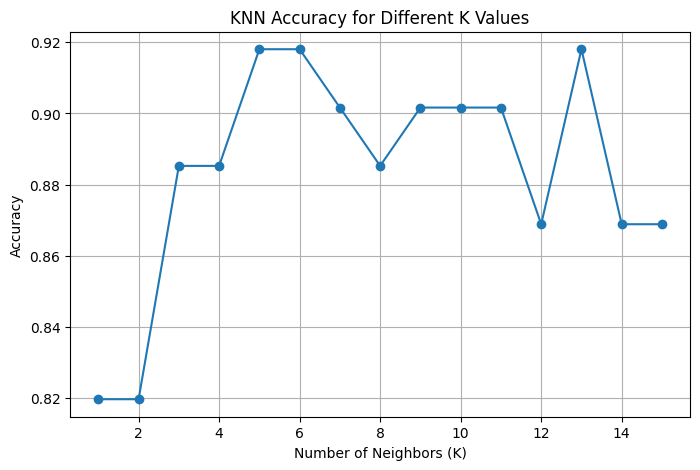

In [17]:
k_values = range(1, 16)
accuracy_scores = []

for k in k_values:
    knn_pipeline.set_params(knn_classifier__n_neighbors=k)
    knn_pipeline.fit(X_train, y_train)
    y_pred = knn_pipeline.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different K Values")
plt.grid(True)
plt.show()


In [18]:
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
best_acc = max(accuracy_scores)

print(f"Best K value: {best_k}")
print(f"Best Accuracy: {best_acc*100:.2f}%")

Best K value: 5
Best Accuracy: 91.80%


K Selection Conclusion
Accuracy increases until K = 5 and then fluctuates.
K = 5 provides the best and most stable performance, so it is selected for the final model.

In [19]:
knn_pipeline.set_params(knn_classifier__n_neighbors=best_k)
knn_pipeline.fit(X_train, y_train)
print("KNN model retrained with the best K value.")

KNN model retrained with the best K value.


In [20]:
joblib.dump(knn_pipeline,"../models/knn_pipeline.joblib")
print("KNN pipeline saved to ../models/knn_pipeline.joblib")
joblib.dump(X_train,"../data/processed/X_train.joblib")
print("X_train saved to ../data/processed/X_train.joblib")
joblib.dump(X_test,"../data/processed/X_test.joblib")
print("X_test saved to ../data/processed/X_test.joblib")
joblib.dump(y_train,"../data/processed/y_train.joblib")
print("y_train saved to ../data/processed/y_train.joblib")
joblib.dump(y_test,"../data/processed/y_test.joblib")
print("y_test saved to ../data/processed/y_test.joblib")
joblib.dump(preprocessor,"../models/preprocessor.joblib")
print("Preprocessor saved to ../models/preprocessor.joblib")

KNN pipeline saved to ../models/knn_pipeline.joblib
X_train saved to ../data/processed/X_train.joblib
X_test saved to ../data/processed/X_test.joblib
y_train saved to ../data/processed/y_train.joblib
y_test saved to ../data/processed/y_test.joblib
Preprocessor saved to ../models/preprocessor.joblib
